<a href="https://colab.research.google.com/github/Oyeniran20/Fake-News-Detection/blob/main/Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fake News Detection**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### **Data Loading and Exploration**

In [7]:
import pandas as pd

In [11]:
df1 = pd.read_excel('/content/Fake_news.xlsx')
df2 = pd.read_excel('//content/True_news.xlsx')
df3 = pd.read_csv('/content/news.csv')

In [12]:
df1.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,FAKE
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,FAKE


In [13]:
df2.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,REAL


In [14]:
df3.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [15]:
df1.shape, df2.shape, df3.shape

((23400, 5), (21417, 5), (6246, 3))

In [16]:
# selecting only the text and label column
df1 = df1[['text', 'label']]
df2 = df2[['text', 'label']]
df3 = df3[['text', 'label']]

In [17]:
# combine the three dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
df

In [ ]:
df = pd.read_csv('/content/train.csv')
df.sample(5)

,text,label
48507,peace prospect dead trump move u embassy jerus...,1.0
55204,lol boston globe get destroy social medium pub...,0.0
43600,turkey detain lawyer hungerstriking teacher ah...,1.0
21561,russia patrol ship yaroslav mudry arrive cuba ...,0.0
59661,emirate willing cooperate rival uae airline et...,1.0


In [ ]:
df.shape

(61614, 2)

In [ ]:
df.isna().sum()

,0
text,0
label,24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61614 entries, 0 to 61613
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    61614 non-null  object 
 1   label   61590 non-null  float64
dtypes: float64(1), object(1)
memory usage: 962.8+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
text,0
label,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61590 entries, 0 to 61613
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    61590 non-null  object 
 1   label   61590 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
df['label'].value_counts()

,count
label,
0.0,30795
1.0,30795


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

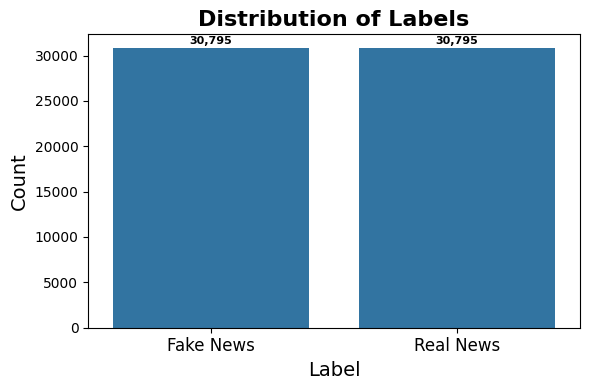

In [ ]:
# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))  # Slightly larger figure for better clarity
sns.barplot(x=label_counts.index, y=label_counts.values)

# Adding title and axis labels
plt.title('Distribution of Labels', fontsize=16, fontweight='bold')
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize x-tick labels
plt.xticks(ticks=[0, 1], labels=['Fake News', 'Real News'], fontsize=12)

# Add value labels above the bars
for i, value in enumerate(label_counts.values):
    plt.text(i, value + 500, f'{value:,}', ha='center', fontsize=8, fontweight='bold')

# Show grid for y-axis for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### **Text Processing**

In [ ]:
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize stopwords and lemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Preprocessing function

def preprocess_text(text):
  text = re.sub('[^a-zA-Z0-9]', ' ', text)
  text = text.lower()
  words = text.split()
  words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
  words = ' '.join(words)
  return words

In [ ]:
# Apply preprocessing

df['text'] = df['text'].apply(preprocess_text)

In [ ]:
print(df['text'])

0        dark agenda behind globalism open border altma...
1        america poor still get shaft sami jamil jadall...
2        number accuser grow former miss finland accuse...
3        heroic prego advertisement replaces refresh we...
4        russia syria debbie reynolds thursday even bri...
                               ...                        
61609    movie studio join disneyled service link digit...
61610    gordon strachan scotland problem strachan scot...
61611    athenia wreck first british ship torpedo ww ca...
61612    rugby league world cup kear name uncapped trio...
61613    brazilian lead u million mattress plead guilty...
Name: text, Length: 61590, dtype: object


### **Word Cloud Visualization**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# combine all text
text = ' '.join(df['text'])

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)

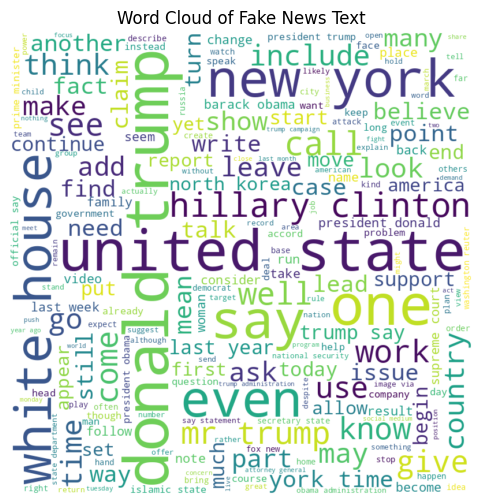

In [ ]:
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Fake News Text')
plt.show()

### **Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

y = df['label']

In [ ]:
# Extract Sparse Matrix Information
matrix_shape = X.shape
non_zero_count = X.nnz  # Number of non-zero elements
total_elements = matrix_shape[0] * matrix_shape[1]
sparsity_percentage = (1 - (non_zero_count / total_elements)) * 100

# Display Sparse Matrix Information
print("=== Sparse Matrix Information (TD-IDF) ===")
print("Matrix Shape:", matrix_shape)
print("Non-Zero Elements:", non_zero_count)
print("Total Elements:", total_elements)
print("Sparsity Percentage:", sparsity_percentage, "%")


=== Sparse Matrix Information (TD-IDF) ===
Matrix Shape: (61590, 249754)
Non-Zero Elements: 10630431
Total Elements: 15382348860
Sparsity Percentage: 99.93089201722863 %


### **Train - Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### **Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

In [ ]:
# Train the models
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Predict the models
logistic_train_pred = logistic_regression.predict(X_train)
logistic_test_pred = logistic_regression.predict(X_test)

random_forest_train_pred = random_forest.predict(X_train)
random_forest_test_pred = random_forest.predict(X_test)

gradient_boosting_train_pred = gradient_boosting.predict(X_train)
gradient_boosting_test_pred = gradient_boosting.predict(X_test)

In [ ]:
# Accuracy
acc_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Train Accuracy': [accuracy_score(y_train, logistic_train_pred),
                       accuracy_score(y_train, random_forest_train_pred),
                       accuracy_score(y_train, gradient_boosting_train_pred)],
    'Test Accuracy': [accuracy_score(y_test, logistic_test_pred),
                      accuracy_score(y_test, random_forest_test_pred),
                      accuracy_score(y_test, gradient_boosting_test_pred)]
}

In [ ]:
acc_df = pd.DataFrame(acc_data)
acc_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.957765,0.940331
1,Random Forest,1.000000,0.929209
2,Gradient Boosting,0.936252,0.933674


In [ ]:
# confusion matrix

models = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting
}

In [ ]:
import seaborn as sns

========= Logistic Regression =========
Confusion Matrix:
[[5845  314]
 [ 421 5738]]


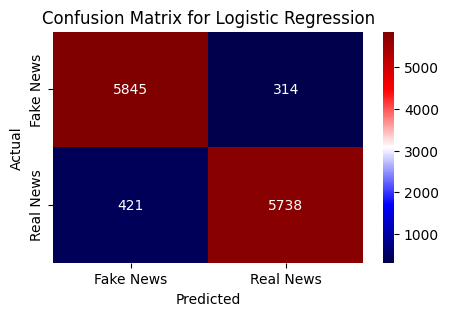

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      6159
         1.0       0.95      0.93      0.94      6159

    accuracy                           0.94     12318
   macro avg       0.94      0.94      0.94     12318
weighted avg       0.94      0.94      0.94     12318



========= Random Forest =========
Confusion Matrix:
[[5782  377]
 [ 495 5664]]


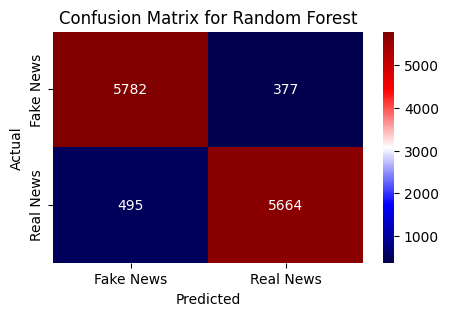

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      6159
         1.0       0.94      0.92      0.93      6159

    accuracy                           0.93     12318
   macro avg       0.93      0.93      0.93     12318
weighted avg       0.93      0.93      0.93     12318



========= Gradient Boosting =========
Confusion Matrix:
[[5897  262]
 [ 555 5604]]


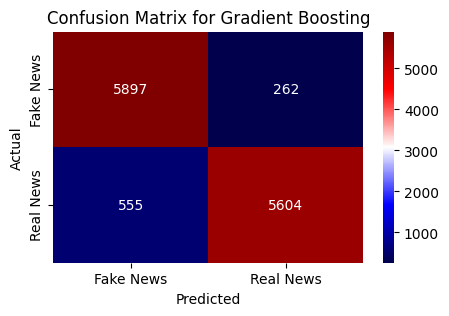

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      6159
         1.0       0.96      0.91      0.93      6159

    accuracy                           0.93     12318
   macro avg       0.93      0.93      0.93     12318
weighted avg       0.93      0.93      0.93     12318





In [ ]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'========= {model_name} =========')

    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    print('Confusion Matrix:')
    print(cm)

    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='seismic',
                xticklabels= ['Fake News', 'Real News'],
                yticklabels= ['Fake News', 'Real News'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    print('\n')

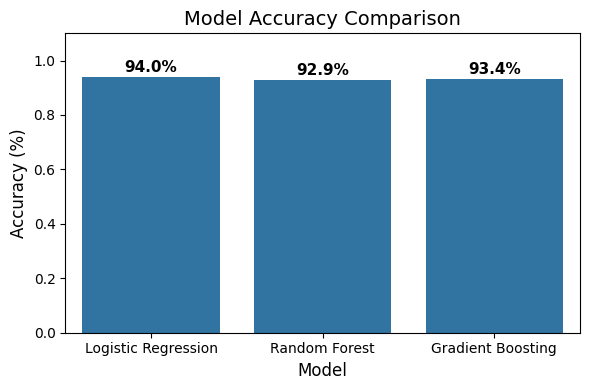

In [ ]:
# Create the bar plot
plt.figure(figsize=(6, 4))
barplot = sns.barplot(x='Model', y='Test Accuracy', data=acc_df)

# Add accuracy percentages on top of the bars
for bar in barplot.patches:
    accuracy = bar.get_height() * 100  # Convert to percentage
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005,  # Slightly above the bar
        f'{accuracy:.1f}%',
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )

# Add labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylim(0, 1.1)  # Extend y-axis slightly to fit the text
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
model_metrics = []

# Iterating over models and calculate confusion matrix, precision, recall, F1-score
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Precision, Recall, F1-score
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Add the metrics to the list
    model_metrics.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'True Positives (TP)': tp,
        'False Positives (FP)': fp,
        'True Negatives (TN)': tn,
        'False Negatives (FN)': fn
    })

# DataFrame for comparison
metrics_df = pd.DataFrame(model_metrics)

In [ ]:
metrics_df

,Model,Precision,Recall,F1-Score,True Positives (TP),False Positives (FP),True Negatives (TN),False Negatives (FN)
0,Logistic Regression,0.948116,0.931645,0.939808,5738,314,5845,421
1,Random Forest,0.937593,0.919630,0.928525,5664,377,5782,495
2,Gradient Boosting,0.955336,0.909888,0.932058,5604,262,5897,555


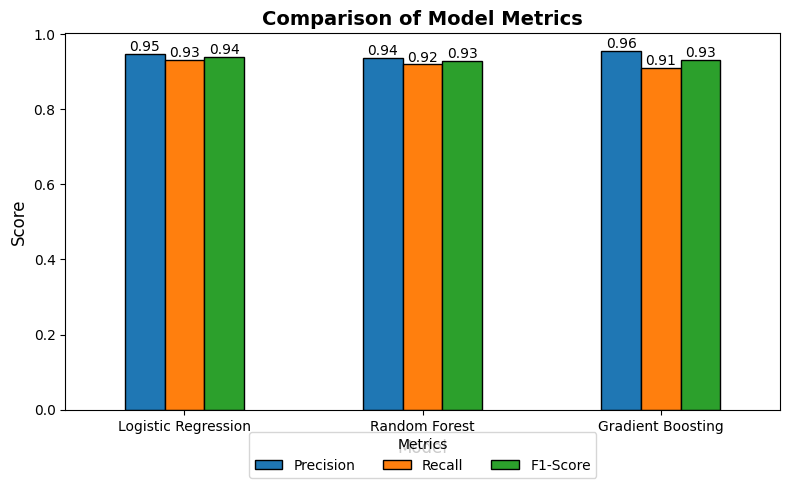

In [ ]:
# Enhanced Plot for Metrics Comparison with Scores
fig, ax = plt.subplots(figsize=(6, 4))

# Create a bar plot
bar_plot = metrics_df.set_index('Model')[['Precision', 'Recall', 'F1-Score']].plot(
    kind='bar',
    figsize=(8, 5),
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Custom colors
    edgecolor='black',
    ax=ax
)

# Add score values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# Adding title and labels
plt.title('Comparison of Model Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)

# Adjust x-ticks
plt.xticks(rotation=0, fontsize=10)

# Add a legend with improved location
plt.legend(title='Metrics', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=10)

# Show grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure layout fits well
plt.tight_layout()

# Show the plot
plt.show()

========= Logistic Regression =========
ROC-AUC Score: 0.9843


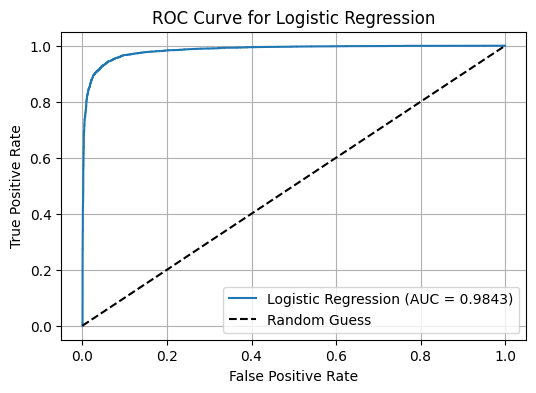

========= Random Forest =========
ROC-AUC Score: 0.9826


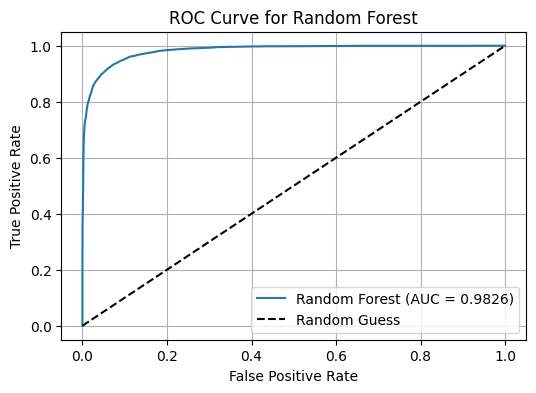

========= Gradient Boosting =========
ROC-AUC Score: 0.9796


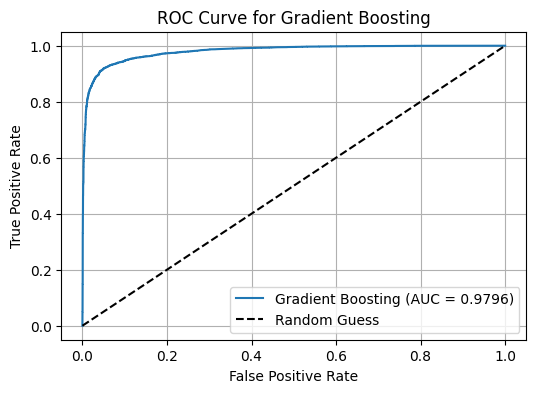

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Loop through each model
for model_name, model in models.items():
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC-AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f'========= {model_name} =========')
    print(f'ROC-AUC Score: {auc_score:.4f}')

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


## **Save the Model**

In [ ]:
# save the best model
import joblib
joblib.dump(random_forest, 'rf_model.pkl')

['rf_model.pkl']

In [ ]:
# save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

## **Load the saved model and vectorizer**

In [ ]:
load_model = joblib.load('rf_model.pkl')
load_vectorizer = joblib.load('vectorizer.pkl')

print('The model and vectorizer are loaded successfully')

The model and vectorizer are loaded successfully


## **Test with sample dataset**

In [ ]:
sample_text = [
    "trump promise new deal black america trump promise new deal black america ben kamisar hill october donald trump call new deal black america wednesday afternoon address work bridge gap face crucial vote bloc less two week election day speak charlotte nc gop presidential nominee criticize year democratic rule leave black america behind outlined plan help deal grounded three promise safe community great education highpaying job trump say speaking appear script remark whether vote great champion live divide country great champion snip africanamerican citizen sacrifice much nation fight died every war since revolution pew picket line lift conscience country long march civil right yet many africanamericans leave behind trump call incentive move company blight neighborhood bolster employment help africanamericans get good access credit push city declare blighted community disaster area help rebuild infrastructure also say support increase number police officer area connect lack officer rise murder rate major city trump call focus remove gang member criminal cartel blame clinton promote war police mention accusation police brutality minority feel disproportionately target snip",
    "foundation tie bedevil hillary clinton presidential campaign new york time kingdom saudi arabia donate million foundation former ukrainian president whose government widely criticize corruption murder journalist developer vast business interest contribute much million year bill hillary chelsea clinton foundation thrive largely generosity foreign donor individual give hundred million dollar global charity mrs clinton seek white house funding sprawl philanthropy become achilles heel campaign victorious potentially administration well mrs clinton face accusation favoritism toward clinton foundation donor time secretary state former president bill clinton tell foundation employee thursday organization would longer accept foreign corporate donation mrs clinton win november move could avoid awkwardness mr clinton jet around world ask money wife president resolve press question administration would handle longtime donor seek help united state whose interest might conflict country clinton foundation accept ten million dollar country state department mr clinton time secretary criticize record sex discrimination issue country include saudi arabia united arab emirates qatar kuwait oman brunei algeria saudi arabia particularly generous benefactor kingdom give million million clinton foundation donation typically report broad range specific amount least million donated friend saudi arabia saudi prince saudi arabia also present washington complex diplomatic relationship full strain kingdom view bulwark deter iranian adventurism across region partner fight terrorism across persian gulf wider middle east time though american official long worried saudi arabia suspect role promote strain islam adherent link violence saudi official deny link terrorism group critic point saudi charity fund organization suspect tie militant cell brian fallon spokesman clinton campaign say clinton foundation always careful donor policy govern foundation activity hillary clinton tenure secretary state already go far beyond legal requirement say statement yet foundation submit even rigorous standard clinton declare candidacy president pledge go even win mrs clinton opponent donald j trump could face complication become president investment abroad hundred million dollar real estate debt financial position could affect move make white house friday paul manafort resign chairman trump campaign part report lucrative consult work behalf ukrainian politician still mr trump seize email release past several week mrs clinton tenure secretary state handful donor mention attacked email chain show douglas j band adviser mr clinton seek arrange meeting senior american government official gilbert chagoury real estate developer donate million million mr chagoury explain spokesman simply want provide insight election lebanon email record describe donor seek case obtain meeting state department official none show mrs clinton making decision favor contributor ally fear additional email might come provide fodder mr trump craig minassian spokesman foundation say decision forgo corporate foreign money nothing email foundation continue raise money american individual charity factor remove perception problem win presidency say make sure program continue form people help tom fitton president judicial watch conservative group sue obtain record mrs clinton time state department say damage do conflict interest cast stone something clinton administration go grapple mr fitton say cast shadow policy election year majority american say trust mr clinton even ally question foundation rein foreign donation sooner end immediately bloomberg poll june show percent voter say bother either lot little clinton foundation take money foreign country mrs clinton secretary state international poll month percent voter say mr clinton completely step foundation percent say able continue work foundation wife become president mr clinton say thursday would leave foundation board mrs clinton edward g rendell former democratic governor pennsylvania say foundation disband mrs clinton win add would make sense charity stop take foreign donation immediately think right thing mr rendell say right thing without question first gentleman nothing raise money foundation mr minassian say end foreign source money could find without know win election could needlessly gut program help provide instance h v medication child africa begin foundation raise roughly billion overseen board include mr clinton couple daughter chelsea mr clinton join left state department step begin campaign work cover country help fund project former president helm prove particularly productive foreign leader business people open door wallet preternaturally sociable mr clinton among charity accomplishment clinton health access initiative run ira c magaziner white house aide involve mrs clinton fail effort overhaul health care system husband first term renegotiate cost h v drug make accessible million people foundation help bring healthy meal school united state help farmer east africa increase yield accord foundation tally december shortly mrs clinton become secretary state mr clinton release list donor defuse speculation conflict soon mrs clinton agree keep foundation matter separate official business include pledge participate personally substantially particular matter direct predictable effect upon foundation without waiver obama white house particularly dislike gathering world leader academics business people call clinton global initiative foundation hold overseas foundation limit conference domestic location mrs clinton secretary state thursday mr clinton say gathering september new york would foundation last one attendee conferences speaks stickiness donor relationship victor pinchuk steel magnate whose leonid kuchma president ukraine direct million million foundation lent private plane clinton travel los angeles attend mr clinton th birthday celebration september november douglas e schoen former political consultant mr clinton arrange dozen meeting state department official behalf mr pinchuk discus continue political crisis ukraine accord report mr schoen file registered lobbyist breakfast pinchuk see brookings lunch melanne verveer work state department write june email mr clinton previously undisclosed email obtain citizen united conservative advocacy group public record lawsuit show name mr pinchuk describe one ukraine successful businessmen among list influential people invite dinner party clinton home earlier ambassador john f tefft write mrs clinton visit ukraine chelsea clinton husband marc mezvinsky invitation oligarch victor pinchuk mr clinton reply know hearing nice thing child good get july commerce department begin investigate complaint ukraine extension mr pinchuk company interpipe eight country illegally dump type steel tube american market artificially low price representative mr pinchuk say investigation nothing state department start mr clinton tenure suspend july add least people attend dinner party mrs clinton house mr pinchuk speak briefly democracy ukraine deal involve sale american uranium holding russian enterprise another example foundation intersect mr clinton official role obama administration state department among agency sign deal involved major clinton charitable backer canada evidence mr clinton exert influence deal time transaction donation raise question whether donor receive favorable handle even mr clinton step could remain complication potential president name affix international foundation chelsea clinton vice chairwoman would continue leadership role difficult see organization call clinton foundation continue exist clinton presidency without pose sort consequence say john wonderlich interim executive director sunlight foundation government watchdog group washington announce address egregious potential conflict consider scale scope foundation mr wonderlich say easy name hundred different type conflict reality added recusal president",
    "number week long russia end oil dependence rbth yevgeny biyatov ria novosti russian economy need least year end oil dependence accord statement make head sberbank german gref large amount today gdp base oil gas say sberbank conference oct take time create economy half exist digital business digitize traditional form business think least even year say",
    "codesod rule ten remy porter remy escape enterprise world work consultant editorinchief tdwtf florian office rule ten well one florian coworkers seem think coworker lot thought example write block suppose replace certain character character sbyte sbcount set value new field content old value snewfieldcontent sfieldcontent rfieldidentifierregexmatch snewfieldcontent success security reason sbcount break get identifier name string sactfieldsymbol rfieldidentifierregexmatch snewfieldcontent group value string sactfieldname rfieldidentifierregexmatch snewfieldcontent group value string sactfieldidentifier sactfieldsymbol sactfieldname default value unknown field empty string string svalue calculate actual replacement value replace value placeholder new field content snewfieldcontent snewfieldcontentreplace sactfieldidentifier svalue florian put match inside one line obviously security risk must prohibit would cause erroneous behavior application advertisement infrastructure code build start firstclass windows functionality intuitive visual user interface download otter today",
    "switch chip know anymore home scitech switch chip know anymore switch chip know anymore dr kane targonen los alamos usa immersive quality virtual reality roll right year every household multiple head set eventually progress mind chip people vr set already completely addict sensation total immersion within another world clincher soon able live without vr headset natural progression external device like pair goggles chip implant brain directly link synapsis billion dendrite chip already use severely disabled however development accelerate daily mapping every channel synapse human brain feat already map brain rodent small creature upload scenario directly brain feel see smell feel every nuance programmer introduce world taste food feel wind cheek every sensation feel real world replicate brain directly zone activated neural implant technology sell premise perfect memory data recall imagine go dinner party know head honcho schmooze immediate data download brain imagine able speak language drop hat recall text ever write man blink eye scientist project reveal next step doubt jump intrusive machinery strap body discreet internal implant course every leap forward always leap backwards freedom essentially allow external force mind behaviour modification apps everything future want fly huey download app thirty second expert pilot yes sound matrix consider fact every six month power computer double get close point return process power chip get powerful yet shrink size able alter every facet someone behaviour chip process recognisable one way traffic advertiser able beam advert directly brain comply whichever regime government charge shut implant nightmare brain torture crime see prisoner jail put state mind torture last thousand year accomplish speed mind clock desire level prisoner could therefore spend thousand year break rock end sight mind scientist add head future certainly interesting place introduction artificial intelligent system sentient machinery brainchipping may place human go augmented fashion employer require staff chip transaction require biometric approval therefore wish employ eat need chip share"
]


In [ ]:
processed_text = [preprocess_text(text) for text in sample_text]

In [ ]:
# transform the sample text
sample_vectorized = load_vectorizer.transform(processed_text)

In [ ]:
# Predict using the saved model
prediction = load_model.predict(sample_vectorized)

In [ ]:
labels = {0: 'Fake News',
          1: 'Real News'}

In [ ]:
# The result
print('The result for the fake news detection \n')
for text, label in zip(sample_text, prediction):
  print(f'Text: {text}')
  print(f'Prediction: {labels[label]}')
  print('----' * 40)

The result for the fake news detection 

Text: trump promise new deal black america trump promise new deal black america ben kamisar hill october donald trump call new deal black america wednesday afternoon address work bridge gap face crucial vote bloc less two week election day speak charlotte nc gop presidential nominee criticize year democratic rule leave black america behind outlined plan help deal grounded three promise safe community great education highpaying job trump say speaking appear script remark whether vote great champion live divide country great champion snip africanamerican citizen sacrifice much nation fight died every war since revolution pew picket line lift conscience country long march civil right yet many africanamericans leave behind trump call incentive move company blight neighborhood bolster employment help africanamericans get good access credit push city declare blighted community disaster area help rebuild infrastructure also say support increase number 